# Recehin

## Setup and Imports

In [1]:
SEED = 27

In [2]:
import numpy as np
import matplotlib as mpl
import os
import time
import random

import tensorflow as tf

np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

## Data Loading and Preprocessing

In [3]:
from huggingface_hub import hf_hub_download
from huggingface_hub import snapshot_download

In [4]:
# Download annot
anot_path = hf_hub_download(
    repo_id = "IceKhoffi/idr-coins",
    filename = "_annotations.coco.json",
    repo_type = "dataset"
)

# Download img
img_dir = snapshot_download(
    repo_id="IceKhoffi/idr-coins",
    repo_type="dataset"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


_annotations.coco.json: 0.00B [00:00, ?B/s]

Fetching 398 files:   0%|          | 0/398 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/169 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

coin_0005.jpg:   0%|          | 0.00/547k [00:00<?, ?B/s]

coin_0004.jpg:   0%|          | 0.00/616k [00:00<?, ?B/s]

coin_0003.jpg:   0%|          | 0.00/585k [00:00<?, ?B/s]

coin_0001.jpg:   0%|          | 0.00/602k [00:00<?, ?B/s]

coin_0006.jpg:   0%|          | 0.00/533k [00:00<?, ?B/s]

coin_0002.jpg:   0%|          | 0.00/605k [00:00<?, ?B/s]

coin_0007.jpg:   0%|          | 0.00/559k [00:00<?, ?B/s]

coin_0008.jpg:   0%|          | 0.00/557k [00:00<?, ?B/s]

coin_0010.jpg:   0%|          | 0.00/578k [00:00<?, ?B/s]

coin_0011.jpg:   0%|          | 0.00/538k [00:00<?, ?B/s]

coin_0013.jpg:   0%|          | 0.00/529k [00:00<?, ?B/s]

coin_0012.jpg:   0%|          | 0.00/599k [00:00<?, ?B/s]

coin_0009.jpg:   0%|          | 0.00/659k [00:00<?, ?B/s]

coin_0014.jpg:   0%|          | 0.00/536k [00:00<?, ?B/s]

coin_0015.jpg:   0%|          | 0.00/656k [00:00<?, ?B/s]

coin_0016.jpg:   0%|          | 0.00/626k [00:00<?, ?B/s]

coin_0017.jpg:   0%|          | 0.00/596k [00:00<?, ?B/s]

coin_0018.jpg:   0%|          | 0.00/465k [00:00<?, ?B/s]

coin_0019.jpg:   0%|          | 0.00/564k [00:00<?, ?B/s]

coin_0020.jpg:   0%|          | 0.00/578k [00:00<?, ?B/s]

coin_0021.jpg:   0%|          | 0.00/535k [00:00<?, ?B/s]

coin_0022.jpg:   0%|          | 0.00/509k [00:00<?, ?B/s]

coin_0023.jpg:   0%|          | 0.00/569k [00:00<?, ?B/s]

coin_0024.jpg:   0%|          | 0.00/534k [00:00<?, ?B/s]

coin_0025.jpg:   0%|          | 0.00/625k [00:00<?, ?B/s]

coin_0026.jpg:   0%|          | 0.00/614k [00:00<?, ?B/s]

coin_0027.jpg:   0%|          | 0.00/578k [00:00<?, ?B/s]

coin_0028.jpg:   0%|          | 0.00/583k [00:00<?, ?B/s]

coin_0029.jpg:   0%|          | 0.00/613k [00:00<?, ?B/s]

coin_0030.jpg:   0%|          | 0.00/545k [00:00<?, ?B/s]

coin_0031.jpg:   0%|          | 0.00/506k [00:00<?, ?B/s]

coin_0032.jpg:   0%|          | 0.00/481k [00:00<?, ?B/s]

coin_0033.jpg:   0%|          | 0.00/554k [00:00<?, ?B/s]

coin_0034.jpg:   0%|          | 0.00/588k [00:00<?, ?B/s]

coin_0035.jpg:   0%|          | 0.00/448k [00:00<?, ?B/s]

coin_0036.jpg:   0%|          | 0.00/495k [00:00<?, ?B/s]

coin_0037.jpg:   0%|          | 0.00/500k [00:00<?, ?B/s]

coin_0038.jpg:   0%|          | 0.00/458k [00:00<?, ?B/s]

coin_0040.jpg:   0%|          | 0.00/544k [00:00<?, ?B/s]

coin_0039.jpg:   0%|          | 0.00/565k [00:00<?, ?B/s]

coin_0041.jpg:   0%|          | 0.00/418k [00:00<?, ?B/s]

coin_0042.jpg:   0%|          | 0.00/600k [00:00<?, ?B/s]

coin_0045.jpg:   0%|          | 0.00/489k [00:00<?, ?B/s]

coin_0044.jpg:   0%|          | 0.00/503k [00:00<?, ?B/s]

coin_0046.jpg:   0%|          | 0.00/533k [00:00<?, ?B/s]

coin_0047.jpg:   0%|          | 0.00/421k [00:00<?, ?B/s]

coin_0048.jpg:   0%|          | 0.00/517k [00:00<?, ?B/s]

coin_0049.jpg:   0%|          | 0.00/648k [00:00<?, ?B/s]

coin_0043.jpg:   0%|          | 0.00/465k [00:00<?, ?B/s]

coin_0050.jpg:   0%|          | 0.00/656k [00:00<?, ?B/s]

coin_0051.jpg:   0%|          | 0.00/531k [00:00<?, ?B/s]

coin_0052.jpg:   0%|          | 0.00/599k [00:00<?, ?B/s]

coin_0053.jpg:   0%|          | 0.00/529k [00:00<?, ?B/s]

coin_0054.jpg:   0%|          | 0.00/608k [00:00<?, ?B/s]

coin_0055.jpg:   0%|          | 0.00/552k [00:00<?, ?B/s]

coin_0056.jpg:   0%|          | 0.00/546k [00:00<?, ?B/s]

coin_0057.jpg:   0%|          | 0.00/587k [00:00<?, ?B/s]

coin_0058.jpg:   0%|          | 0.00/595k [00:00<?, ?B/s]

coin_0059.jpg:   0%|          | 0.00/498k [00:00<?, ?B/s]

coin_0060.jpg:   0%|          | 0.00/574k [00:00<?, ?B/s]

coin_0063.jpg:   0%|          | 0.00/528k [00:00<?, ?B/s]

coin_0061.jpg:   0%|          | 0.00/516k [00:00<?, ?B/s]

coin_0062.jpg:   0%|          | 0.00/471k [00:00<?, ?B/s]

coin_0064.jpg:   0%|          | 0.00/546k [00:00<?, ?B/s]

coin_0066.jpg:   0%|          | 0.00/447k [00:00<?, ?B/s]

coin_0065.jpg:   0%|          | 0.00/457k [00:00<?, ?B/s]

coin_0067.jpg:   0%|          | 0.00/513k [00:00<?, ?B/s]

coin_0068.jpg:   0%|          | 0.00/586k [00:00<?, ?B/s]

coin_0069.jpg:   0%|          | 0.00/592k [00:00<?, ?B/s]

coin_0070.jpg:   0%|          | 0.00/561k [00:00<?, ?B/s]

coin_0071.jpg:   0%|          | 0.00/632k [00:00<?, ?B/s]

coin_0072.jpg:   0%|          | 0.00/555k [00:00<?, ?B/s]

coin_0073.jpg:   0%|          | 0.00/595k [00:00<?, ?B/s]

coin_0074.jpg:   0%|          | 0.00/671k [00:00<?, ?B/s]

coin_0075.jpg:   0%|          | 0.00/620k [00:00<?, ?B/s]

coin_0076.jpg:   0%|          | 0.00/414k [00:00<?, ?B/s]

coin_0077.jpg:   0%|          | 0.00/652k [00:00<?, ?B/s]

coin_0078.jpg:   0%|          | 0.00/593k [00:00<?, ?B/s]

coin_0079.jpg:   0%|          | 0.00/551k [00:00<?, ?B/s]

coin_0080.jpg:   0%|          | 0.00/601k [00:00<?, ?B/s]

coin_0081.jpg:   0%|          | 0.00/586k [00:00<?, ?B/s]

coin_0082.jpg:   0%|          | 0.00/520k [00:00<?, ?B/s]

coin_0083.jpg:   0%|          | 0.00/578k [00:00<?, ?B/s]

coin_0084.jpg:   0%|          | 0.00/630k [00:00<?, ?B/s]

coin_0086.jpg:   0%|          | 0.00/592k [00:00<?, ?B/s]

coin_0085.jpg:   0%|          | 0.00/554k [00:00<?, ?B/s]

coin_0087.jpg:   0%|          | 0.00/551k [00:00<?, ?B/s]

coin_0089.jpg:   0%|          | 0.00/571k [00:00<?, ?B/s]

coin_0088.jpg:   0%|          | 0.00/590k [00:00<?, ?B/s]

coin_0090.jpg:   0%|          | 0.00/604k [00:00<?, ?B/s]

coin_0091.jpg:   0%|          | 0.00/550k [00:00<?, ?B/s]

coin_0093.jpg:   0%|          | 0.00/647k [00:00<?, ?B/s]

coin_0094.jpg:   0%|          | 0.00/536k [00:00<?, ?B/s]

coin_0095.jpg:   0%|          | 0.00/584k [00:00<?, ?B/s]

coin_0096.jpg:   0%|          | 0.00/626k [00:00<?, ?B/s]

coin_0092.jpg:   0%|          | 0.00/631k [00:00<?, ?B/s]

coin_0097.jpg:   0%|          | 0.00/584k [00:00<?, ?B/s]

coin_0098.jpg:   0%|          | 0.00/541k [00:00<?, ?B/s]

coin_0099.jpg:   0%|          | 0.00/692k [00:00<?, ?B/s]

coin_0100.jpg:   0%|          | 0.00/662k [00:00<?, ?B/s]

coin_0101.jpg:   0%|          | 0.00/515k [00:00<?, ?B/s]

coin_0102.jpg:   0%|          | 0.00/555k [00:00<?, ?B/s]

coin_0103.jpg:   0%|          | 0.00/651k [00:00<?, ?B/s]

coin_0104.jpg:   0%|          | 0.00/528k [00:00<?, ?B/s]

coin_0105.jpg:   0%|          | 0.00/627k [00:00<?, ?B/s]

coin_0106.jpg:   0%|          | 0.00/627k [00:00<?, ?B/s]

coin_0107.jpg:   0%|          | 0.00/507k [00:00<?, ?B/s]

coin_0111.jpg:   0%|          | 0.00/570k [00:00<?, ?B/s]

coin_0109.jpg:   0%|          | 0.00/615k [00:00<?, ?B/s]

coin_0110.jpg:   0%|          | 0.00/597k [00:00<?, ?B/s]

coin_0108.jpg:   0%|          | 0.00/546k [00:00<?, ?B/s]

coin_0112.jpg:   0%|          | 0.00/578k [00:00<?, ?B/s]

coin_0113.jpg:   0%|          | 0.00/666k [00:00<?, ?B/s]

coin_0114.jpg:   0%|          | 0.00/630k [00:00<?, ?B/s]

coin_0115.jpg:   0%|          | 0.00/535k [00:00<?, ?B/s]

coin_0116.jpg:   0%|          | 0.00/536k [00:00<?, ?B/s]

coin_0117.jpg:   0%|          | 0.00/587k [00:00<?, ?B/s]

coin_0119.jpg:   0%|          | 0.00/603k [00:00<?, ?B/s]

coin_0118.jpg:   0%|          | 0.00/595k [00:00<?, ?B/s]

coin_0120.jpg:   0%|          | 0.00/606k [00:00<?, ?B/s]

coin_0122.jpg:   0%|          | 0.00/536k [00:00<?, ?B/s]

coin_0121.jpg:   0%|          | 0.00/589k [00:00<?, ?B/s]

coin_0123.jpg:   0%|          | 0.00/636k [00:00<?, ?B/s]

coin_0124.jpg:   0%|          | 0.00/521k [00:00<?, ?B/s]

coin_0125.jpg:   0%|          | 0.00/576k [00:00<?, ?B/s]

coin_0126.jpg:   0%|          | 0.00/637k [00:00<?, ?B/s]

coin_0127.jpg:   0%|          | 0.00/589k [00:00<?, ?B/s]

coin_0128.jpg:   0%|          | 0.00/625k [00:00<?, ?B/s]

coin_0129.jpg:   0%|          | 0.00/657k [00:00<?, ?B/s]

coin_0130.jpg:   0%|          | 0.00/572k [00:00<?, ?B/s]

coin_0132.jpg:   0%|          | 0.00/952k [00:00<?, ?B/s]

coin_0131.jpg:   0%|          | 0.00/954k [00:00<?, ?B/s]

coin_0134.jpg:   0%|          | 0.00/931k [00:00<?, ?B/s]

coin_0135.jpg:   0%|          | 0.00/869k [00:00<?, ?B/s]

coin_0133.jpg:   0%|          | 0.00/927k [00:00<?, ?B/s]

coin_0137.jpg:   0%|          | 0.00/922k [00:00<?, ?B/s]

coin_0136.jpg:   0%|          | 0.00/940k [00:00<?, ?B/s]

coin_0138.jpg:   0%|          | 0.00/907k [00:00<?, ?B/s]

coin_0140.jpg:   0%|          | 0.00/980k [00:00<?, ?B/s]

coin_0139.jpg:   0%|          | 0.00/792k [00:00<?, ?B/s]

coin_0141.jpg:   0%|          | 0.00/931k [00:00<?, ?B/s]

coin_0142.jpg:   0%|          | 0.00/871k [00:00<?, ?B/s]

coin_0143.jpg:   0%|          | 0.00/928k [00:00<?, ?B/s]

coin_0144.jpg:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

coin_0145.jpg:   0%|          | 0.00/966k [00:00<?, ?B/s]

coin_0146.jpg:   0%|          | 0.00/972k [00:00<?, ?B/s]

coin_0147.jpg:   0%|          | 0.00/952k [00:00<?, ?B/s]

coin_0148.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0149.jpg:   0%|          | 0.00/941k [00:00<?, ?B/s]

coin_0150.jpg:   0%|          | 0.00/883k [00:00<?, ?B/s]

coin_0151.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0152.jpg:   0%|          | 0.00/902k [00:00<?, ?B/s]

coin_0153.jpg:   0%|          | 0.00/992k [00:00<?, ?B/s]

coin_0154.jpg:   0%|          | 0.00/910k [00:00<?, ?B/s]

coin_0155.jpg:   0%|          | 0.00/949k [00:00<?, ?B/s]

coin_0156.jpg:   0%|          | 0.00/949k [00:00<?, ?B/s]

coin_0157.jpg:   0%|          | 0.00/982k [00:00<?, ?B/s]

coin_0159.jpg:   0%|          | 0.00/875k [00:00<?, ?B/s]

coin_0158.jpg:   0%|          | 0.00/966k [00:00<?, ?B/s]

coin_0160.jpg:   0%|          | 0.00/954k [00:00<?, ?B/s]

coin_0161.jpg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

coin_0162.jpg:   0%|          | 0.00/910k [00:00<?, ?B/s]

coin_0163.jpg:   0%|          | 0.00/904k [00:00<?, ?B/s]

coin_0165.jpg:   0%|          | 0.00/899k [00:00<?, ?B/s]

coin_0164.jpg:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

coin_0167.jpg:   0%|          | 0.00/813k [00:00<?, ?B/s]

coin_0166.jpg:   0%|          | 0.00/915k [00:00<?, ?B/s]

coin_0168.jpg:   0%|          | 0.00/908k [00:00<?, ?B/s]

coin_0170.jpg:   0%|          | 0.00/905k [00:00<?, ?B/s]

coin_0169.jpg:   0%|          | 0.00/949k [00:00<?, ?B/s]

coin_0171.jpg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

coin_0172.jpg:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

coin_0173.jpg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

coin_0174.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0175.jpg:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

coin_0176.jpg:   0%|          | 0.00/915k [00:00<?, ?B/s]

coin_0177.jpg:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

coin_0178.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0179.jpg:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

coin_0180.jpg:   0%|          | 0.00/868k [00:00<?, ?B/s]

coin_0182.jpg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

coin_0181.jpg:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

coin_0183.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0184.jpg:   0%|          | 0.00/986k [00:00<?, ?B/s]

coin_0185.jpg:   0%|          | 0.00/981k [00:00<?, ?B/s]

coin_0186.jpg:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

coin_0188.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0189.jpg:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

coin_0191.jpg:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

coin_0192.jpg:   0%|          | 0.00/897k [00:00<?, ?B/s]

coin_0190.jpg:   0%|          | 0.00/848k [00:00<?, ?B/s]

coin_0193.jpg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

coin_0187.jpg:   0%|          | 0.00/948k [00:00<?, ?B/s]

coin_0194.jpg:   0%|          | 0.00/940k [00:00<?, ?B/s]

coin_0196.jpg:   0%|          | 0.00/919k [00:00<?, ?B/s]

coin_0197.jpg:   0%|          | 0.00/961k [00:00<?, ?B/s]

coin_0198.jpg:   0%|          | 0.00/993k [00:00<?, ?B/s]

coin_0195.jpg:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

coin_0199.jpg:   0%|          | 0.00/977k [00:00<?, ?B/s]

coin_0200.jpg:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

coin_0201.jpg:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

coin_0202.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0203.jpg:   0%|          | 0.00/846k [00:00<?, ?B/s]

coin_0204.jpg:   0%|          | 0.00/980k [00:00<?, ?B/s]

coin_0205.jpg:   0%|          | 0.00/968k [00:00<?, ?B/s]

coin_0206.jpg:   0%|          | 0.00/977k [00:00<?, ?B/s]

coin_0207.jpg:   0%|          | 0.00/935k [00:00<?, ?B/s]

coin_0208.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0209.jpg:   0%|          | 0.00/702k [00:00<?, ?B/s]

coin_0210.jpg:   0%|          | 0.00/951k [00:00<?, ?B/s]

coin_0212.jpg:   0%|          | 0.00/756k [00:00<?, ?B/s]

coin_0211.jpg:   0%|          | 0.00/945k [00:00<?, ?B/s]

coin_0213.jpg:   0%|          | 0.00/956k [00:00<?, ?B/s]

coin_0216.jpg:   0%|          | 0.00/941k [00:00<?, ?B/s]

coin_0217.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0214.jpg:   0%|          | 0.00/971k [00:00<?, ?B/s]

coin_0215.jpg:   0%|          | 0.00/834k [00:00<?, ?B/s]

coin_0218.jpg:   0%|          | 0.00/973k [00:00<?, ?B/s]

coin_0219.jpg:   0%|          | 0.00/964k [00:00<?, ?B/s]

coin_0220.jpg:   0%|          | 0.00/954k [00:00<?, ?B/s]

coin_0221.jpg:   0%|          | 0.00/876k [00:00<?, ?B/s]

coin_0222.jpg:   0%|          | 0.00/857k [00:00<?, ?B/s]

coin_0226.jpg:   0%|          | 0.00/898k [00:00<?, ?B/s]

coin_0225.jpg:   0%|          | 0.00/957k [00:00<?, ?B/s]

coin_0224.jpg:   0%|          | 0.00/998k [00:00<?, ?B/s]

coin_0223.jpg:   0%|          | 0.00/831k [00:00<?, ?B/s]

coin_0227.jpg:   0%|          | 0.00/951k [00:00<?, ?B/s]

coin_0228.jpg:   0%|          | 0.00/870k [00:00<?, ?B/s]

coin_0230.jpg:   0%|          | 0.00/925k [00:00<?, ?B/s]

coin_0229.jpg:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

coin_0231.jpg:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

coin_0232.jpg:   0%|          | 0.00/992k [00:00<?, ?B/s]

coin_0233.jpg:   0%|          | 0.00/947k [00:00<?, ?B/s]

coin_0234.jpg:   0%|          | 0.00/955k [00:00<?, ?B/s]

coin_0235.jpg:   0%|          | 0.00/966k [00:00<?, ?B/s]

coin_0236.jpg:   0%|          | 0.00/971k [00:00<?, ?B/s]

coin_0237.jpg:   0%|          | 0.00/989k [00:00<?, ?B/s]

coin_0238.jpg:   0%|          | 0.00/789k [00:00<?, ?B/s]

coin_0240.jpg:   0%|          | 0.00/872k [00:00<?, ?B/s]

coin_0241.jpg:   0%|          | 0.00/940k [00:00<?, ?B/s]

coin_0239.jpg:   0%|          | 0.00/740k [00:00<?, ?B/s]

coin_0242.jpg:   0%|          | 0.00/920k [00:00<?, ?B/s]

coin_0243.jpg:   0%|          | 0.00/944k [00:00<?, ?B/s]

coin_0244.jpg:   0%|          | 0.00/883k [00:00<?, ?B/s]

coin_0246.jpg:   0%|          | 0.00/978k [00:00<?, ?B/s]

coin_0247.jpg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

coin_0248.jpg:   0%|          | 0.00/989k [00:00<?, ?B/s]

coin_0249.jpg:   0%|          | 0.00/769k [00:00<?, ?B/s]

coin_0250.jpg:   0%|          | 0.00/893k [00:00<?, ?B/s]

coin_0245.jpg:   0%|          | 0.00/808k [00:00<?, ?B/s]

coin_0251.jpg:   0%|          | 0.00/931k [00:00<?, ?B/s]

coin_0252.jpg:   0%|          | 0.00/837k [00:00<?, ?B/s]

coin_0253.jpg:   0%|          | 0.00/861k [00:00<?, ?B/s]

coin_0254.jpg:   0%|          | 0.00/990k [00:00<?, ?B/s]

coin_0255.jpg:   0%|          | 0.00/808k [00:00<?, ?B/s]

coin_0256.jpg:   0%|          | 0.00/884k [00:00<?, ?B/s]

coin_0257.jpg:   0%|          | 0.00/844k [00:00<?, ?B/s]

coin_0258.jpg:   0%|          | 0.00/965k [00:00<?, ?B/s]

coin_0259.jpg:   0%|          | 0.00/979k [00:00<?, ?B/s]

coin_0260.jpg:   0%|          | 0.00/986k [00:00<?, ?B/s]

coin_0261.jpg:   0%|          | 0.00/986k [00:00<?, ?B/s]

coin_0262.jpg:   0%|          | 0.00/859k [00:00<?, ?B/s]

coin_0263.jpg:   0%|          | 0.00/884k [00:00<?, ?B/s]

coin_0264.jpg:   0%|          | 0.00/847k [00:00<?, ?B/s]

coin_0266.jpg:   0%|          | 0.00/969k [00:00<?, ?B/s]

coin_0265.jpg:   0%|          | 0.00/875k [00:00<?, ?B/s]

coin_0267.jpg:   0%|          | 0.00/970k [00:00<?, ?B/s]

coin_0268.jpg:   0%|          | 0.00/878k [00:00<?, ?B/s]

coin_0269.jpg:   0%|          | 0.00/841k [00:00<?, ?B/s]

coin_0270.jpg:   0%|          | 0.00/960k [00:00<?, ?B/s]

coin_0271.jpg:   0%|          | 0.00/885k [00:00<?, ?B/s]

coin_0272.jpg:   0%|          | 0.00/912k [00:00<?, ?B/s]

coin_0273.jpg:   0%|          | 0.00/800k [00:00<?, ?B/s]

coin_0274.jpg:   0%|          | 0.00/971k [00:00<?, ?B/s]

coin_0275.jpg:   0%|          | 0.00/885k [00:00<?, ?B/s]

coin_0276.jpg:   0%|          | 0.00/977k [00:00<?, ?B/s]

coin_0277.jpg:   0%|          | 0.00/980k [00:00<?, ?B/s]

coin_0278.jpg:   0%|          | 0.00/948k [00:00<?, ?B/s]

coin_0279.jpg:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

coin_0280.jpg:   0%|          | 0.00/850k [00:00<?, ?B/s]

coin_0281.jpg:   0%|          | 0.00/954k [00:00<?, ?B/s]

coin_0282.jpg:   0%|          | 0.00/890k [00:00<?, ?B/s]

coin_0284.jpg:   0%|          | 0.00/954k [00:00<?, ?B/s]

coin_0285.jpg:   0%|          | 0.00/947k [00:00<?, ?B/s]

coin_0283.jpg:   0%|          | 0.00/823k [00:00<?, ?B/s]

coin_0286.jpg:   0%|          | 0.00/907k [00:00<?, ?B/s]

coin_0287.jpg:   0%|          | 0.00/803k [00:00<?, ?B/s]

coin_0288.jpg:   0%|          | 0.00/961k [00:00<?, ?B/s]

coin_0289.jpg:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

coin_0290.jpg:   0%|          | 0.00/772k [00:00<?, ?B/s]

coin_0291.jpg:   0%|          | 0.00/873k [00:00<?, ?B/s]

coin_0292.jpg:   0%|          | 0.00/617k [00:00<?, ?B/s]

coin_0293.jpg:   0%|          | 0.00/893k [00:00<?, ?B/s]

coin_0294.jpg:   0%|          | 0.00/948k [00:00<?, ?B/s]

coin_0295.jpg:   0%|          | 0.00/922k [00:00<?, ?B/s]

coin_0296.jpg:   0%|          | 0.00/974k [00:00<?, ?B/s]

coin_0297.jpg:   0%|          | 0.00/884k [00:00<?, ?B/s]

coin_0298.jpg:   0%|          | 0.00/869k [00:00<?, ?B/s]

coin_0299.jpg:   0%|          | 0.00/966k [00:00<?, ?B/s]

coin_0300.jpg:   0%|          | 0.00/881k [00:00<?, ?B/s]

coin_0301.jpg:   0%|          | 0.00/791k [00:00<?, ?B/s]

coin_0302.jpg:   0%|          | 0.00/910k [00:00<?, ?B/s]

coin_0303.jpg:   0%|          | 0.00/746k [00:00<?, ?B/s]

coin_0306.jpg:   0%|          | 0.00/797k [00:00<?, ?B/s]

coin_0304.jpg:   0%|          | 0.00/820k [00:00<?, ?B/s]

coin_0307.jpg:   0%|          | 0.00/693k [00:00<?, ?B/s]

coin_0305.jpg:   0%|          | 0.00/979k [00:00<?, ?B/s]

coin_0308.jpg:   0%|          | 0.00/873k [00:00<?, ?B/s]

coin_0309.jpg:   0%|          | 0.00/942k [00:00<?, ?B/s]

coin_0311.jpg:   0%|          | 0.00/956k [00:00<?, ?B/s]

coin_0310.jpg:   0%|          | 0.00/737k [00:00<?, ?B/s]

coin_0312.jpg:   0%|          | 0.00/867k [00:00<?, ?B/s]

coin_0313.jpg:   0%|          | 0.00/735k [00:00<?, ?B/s]

coin_0315.jpg:   0%|          | 0.00/853k [00:00<?, ?B/s]

coin_0316.jpg:   0%|          | 0.00/873k [00:00<?, ?B/s]

coin_0317.jpg:   0%|          | 0.00/834k [00:00<?, ?B/s]

coin_0314.jpg:   0%|          | 0.00/903k [00:00<?, ?B/s]

coin_0318.jpg:   0%|          | 0.00/897k [00:00<?, ?B/s]

coin_0319.jpg:   0%|          | 0.00/747k [00:00<?, ?B/s]

coin_0320.jpg:   0%|          | 0.00/972k [00:00<?, ?B/s]

coin_0321.jpg:   0%|          | 0.00/974k [00:00<?, ?B/s]

coin_0322.jpg:   0%|          | 0.00/899k [00:00<?, ?B/s]

coin_0323.jpg:   0%|          | 0.00/653k [00:00<?, ?B/s]

coin_0324.jpg:   0%|          | 0.00/570k [00:00<?, ?B/s]

coin_0325.jpg:   0%|          | 0.00/585k [00:00<?, ?B/s]

coin_0326.jpg:   0%|          | 0.00/654k [00:00<?, ?B/s]

coin_0327.jpg:   0%|          | 0.00/559k [00:00<?, ?B/s]

coin_0328.jpg:   0%|          | 0.00/647k [00:00<?, ?B/s]

coin_0329.jpg:   0%|          | 0.00/525k [00:00<?, ?B/s]

coin_0331.jpg:   0%|          | 0.00/628k [00:00<?, ?B/s]

coin_0332.jpg:   0%|          | 0.00/689k [00:00<?, ?B/s]

coin_0330.jpg:   0%|          | 0.00/653k [00:00<?, ?B/s]

coin_0333.jpg:   0%|          | 0.00/501k [00:00<?, ?B/s]

coin_0334.jpg:   0%|          | 0.00/556k [00:00<?, ?B/s]

coin_0337.jpg:   0%|          | 0.00/579k [00:00<?, ?B/s]

coin_0335.jpg:   0%|          | 0.00/550k [00:00<?, ?B/s]

coin_0336.jpg:   0%|          | 0.00/647k [00:00<?, ?B/s]

coin_0338.jpg:   0%|          | 0.00/644k [00:00<?, ?B/s]

coin_0339.jpg:   0%|          | 0.00/639k [00:00<?, ?B/s]

coin_0340.jpg:   0%|          | 0.00/617k [00:00<?, ?B/s]

coin_0342.jpg:   0%|          | 0.00/556k [00:00<?, ?B/s]

coin_0343.jpg:   0%|          | 0.00/627k [00:00<?, ?B/s]

coin_0344.jpg:   0%|          | 0.00/564k [00:00<?, ?B/s]

coin_0345.jpg:   0%|          | 0.00/675k [00:00<?, ?B/s]

coin_0341.jpg:   0%|          | 0.00/597k [00:00<?, ?B/s]

coin_0346.jpg:   0%|          | 0.00/679k [00:00<?, ?B/s]

coin_0347.jpg:   0%|          | 0.00/578k [00:00<?, ?B/s]

coin_0348.jpg:   0%|          | 0.00/635k [00:00<?, ?B/s]

coin_0349.jpg:   0%|          | 0.00/553k [00:00<?, ?B/s]

coin_0350.jpg:   0%|          | 0.00/550k [00:00<?, ?B/s]

coin_0352.jpg:   0%|          | 0.00/570k [00:00<?, ?B/s]

coin_0353.jpg:   0%|          | 0.00/674k [00:00<?, ?B/s]

coin_0351.jpg:   0%|          | 0.00/663k [00:00<?, ?B/s]

coin_0354.jpg:   0%|          | 0.00/641k [00:00<?, ?B/s]

coin_0355.jpg:   0%|          | 0.00/483k [00:00<?, ?B/s]

coin_0356.jpg:   0%|          | 0.00/640k [00:00<?, ?B/s]

coin_0357.jpg:   0%|          | 0.00/541k [00:00<?, ?B/s]

coin_0358.jpg:   0%|          | 0.00/575k [00:00<?, ?B/s]

coin_0359.jpg:   0%|          | 0.00/653k [00:00<?, ?B/s]

coin_0360.jpg:   0%|          | 0.00/684k [00:00<?, ?B/s]

coin_0361.jpg:   0%|          | 0.00/493k [00:00<?, ?B/s]

coin_0362.jpg:   0%|          | 0.00/555k [00:00<?, ?B/s]

coin_0363.jpg:   0%|          | 0.00/645k [00:00<?, ?B/s]

coin_0364.jpg:   0%|          | 0.00/572k [00:00<?, ?B/s]

coin_0366.jpg:   0%|          | 0.00/651k [00:00<?, ?B/s]

coin_0367.jpg:   0%|          | 0.00/659k [00:00<?, ?B/s]

coin_0368.jpg:   0%|          | 0.00/568k [00:00<?, ?B/s]

coin_0369.jpg:   0%|          | 0.00/628k [00:00<?, ?B/s]

coin_0370.jpg:   0%|          | 0.00/673k [00:00<?, ?B/s]

coin_0365.jpg:   0%|          | 0.00/639k [00:00<?, ?B/s]

coin_0371.jpg:   0%|          | 0.00/542k [00:00<?, ?B/s]

coin_0372.jpg:   0%|          | 0.00/609k [00:00<?, ?B/s]

coin_0374.jpg:   0%|          | 0.00/671k [00:00<?, ?B/s]

coin_0373.jpg:   0%|          | 0.00/652k [00:00<?, ?B/s]

coin_0375.jpg:   0%|          | 0.00/661k [00:00<?, ?B/s]

coin_0376.jpg:   0%|          | 0.00/548k [00:00<?, ?B/s]

coin_0377.jpg:   0%|          | 0.00/535k [00:00<?, ?B/s]

coin_0380.jpg:   0%|          | 0.00/703k [00:00<?, ?B/s]

coin_0379.jpg:   0%|          | 0.00/602k [00:00<?, ?B/s]

coin_0378.jpg:   0%|          | 0.00/583k [00:00<?, ?B/s]

coin_0382.jpg:   0%|          | 0.00/586k [00:00<?, ?B/s]

coin_0381.jpg:   0%|          | 0.00/670k [00:00<?, ?B/s]

coin_0383.jpg:   0%|          | 0.00/682k [00:00<?, ?B/s]

coin_0384.jpg:   0%|          | 0.00/542k [00:00<?, ?B/s]

coin_0385.jpg:   0%|          | 0.00/494k [00:00<?, ?B/s]

coin_0386.jpg:   0%|          | 0.00/651k [00:00<?, ?B/s]

coin_0387.jpg:   0%|          | 0.00/605k [00:00<?, ?B/s]

coin_0388.jpg:   0%|          | 0.00/574k [00:00<?, ?B/s]

coin_0389.jpg:   0%|          | 0.00/682k [00:00<?, ?B/s]

coin_0390.jpg:   0%|          | 0.00/568k [00:00<?, ?B/s]

coin_0391.jpg:   0%|          | 0.00/632k [00:00<?, ?B/s]

coin_0392.jpg:   0%|          | 0.00/629k [00:00<?, ?B/s]

coin_0393.jpg:   0%|          | 0.00/650k [00:00<?, ?B/s]

coin_0394.jpg:   0%|          | 0.00/549k [00:00<?, ?B/s]

coin_0395.jpg:   0%|          | 0.00/607k [00:00<?, ?B/s]

In [5]:
import json

In [6]:
# Load Coco Annotation
with open(anot_path, "r") as f:
    coco = json.load(f)

images = {img["id"]: img for img in coco["images"]}
annotations = coco["annotations"]
categories = {cat["id"]: cat for cat in coco["categories"]}

In [7]:
id_new = {1:0 , 2:1, 3:2, 4:3}

In [8]:
def create_tf_dataset(annotations, images, img_dir, img_size = (320, 320), batch_size = 8, shuffle_buffer = 200, training = True):

  def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, 3)
    img = tf.image.resize(img, img_size)
    return img / 255.0

  def data_gen():
    for ann in annotations:
      img_info = images[ann["image_id"]]
      img_path = os.path.join(img_dir, img_info["file_name"])

      yield img_path, id_new[ann["category_id"]]

  def parse_example(path, label):
    img = load_image(path)
    return img, label

  def augment(img, label):
    # Horizontal
    if tf.random.uniform(()) > 0.5:
      img = tf.image.flip_left_right(img)

    # Vertical
    if tf.random.uniform(()) > 0.5:
      img = tf.image.flip_up_down(img)

    return img, label

  ds = tf.data.Dataset.from_generator(
      data_gen,
      output_types = (tf.string, tf.int32),
      output_shapes = ((), ())
  )

  ds = ds.map(parse_example, tf.data.AUTOTUNE)

  if training:
    ds = ds.map(augment, tf.data.AUTOTUNE)
    ds = ds.shuffle(shuffle_buffer)

  ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

  return ds

train_ds = create_tf_dataset(
    annotations = annotations,
    images = images,
    img_dir = img_dir,
    img_size = (320, 320),
    batch_size = 8,
    shuffle_buffer = 200,
    training = True
)

val_ds = create_tf_dataset(
    annotations = annotations,
    images = images,
    img_dir = img_dir,
    img_size = (320, 320),
    batch_size = 8,
    training = False
)

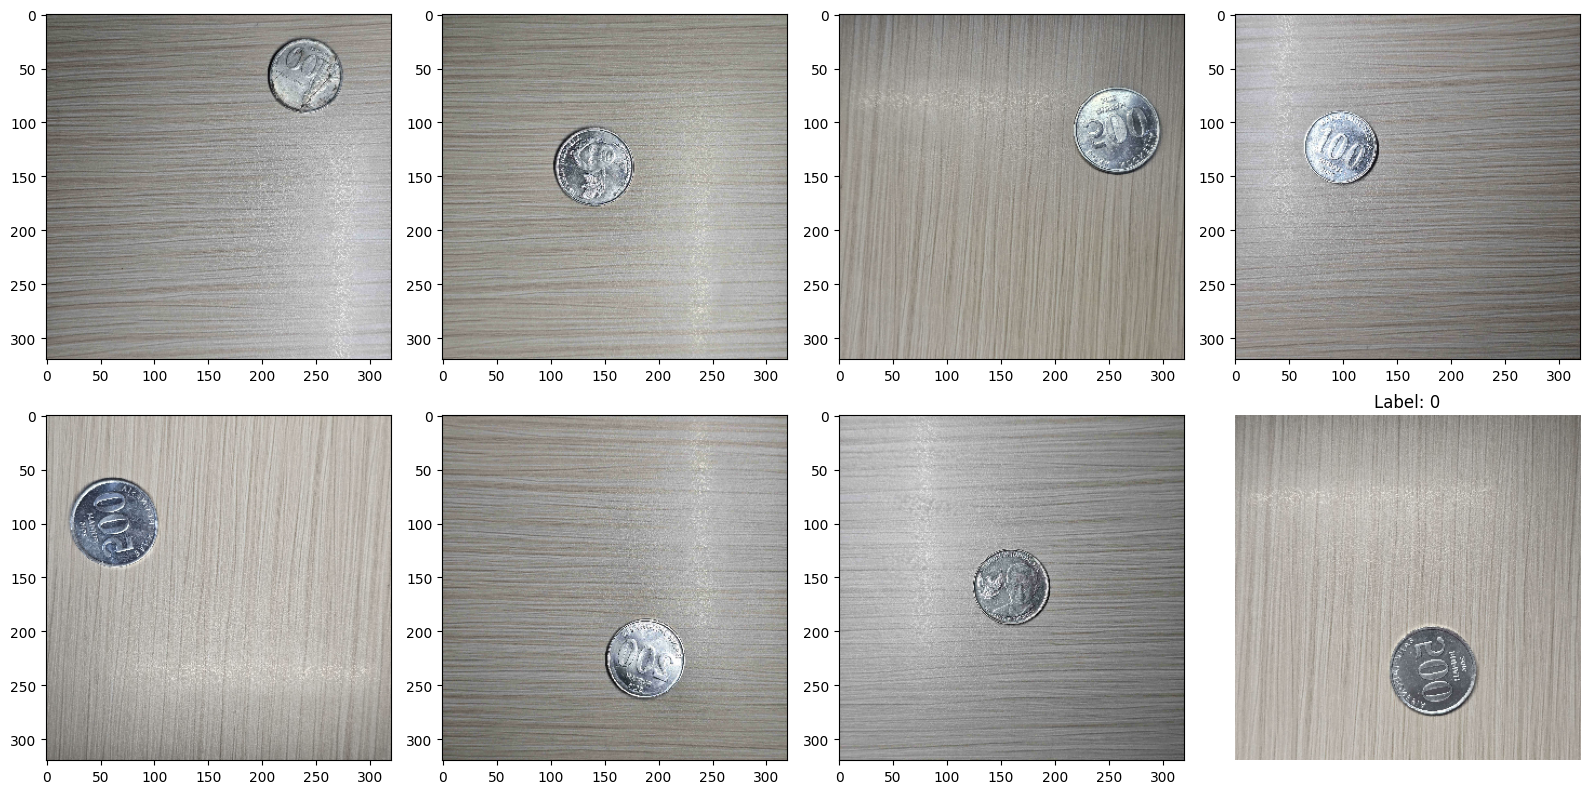

In [9]:
images, labels = next(iter(train_ds))

batch_size = images.shape[0]

cols = 4
rows = batch_size // cols + (batch_size % cols > 0)

fig, axes = mpl.pyplot.subplots(rows, cols, figsize = (16, 8))
axes = axes.flatten()

for i in range(batch_size):
  img = images[i].numpy()
  label = labels[i].numpy()

  ax = axes[i]
  ax.imshow(img)
  mpl.pyplot.title(f"Label: {label}")
  mpl.pyplot.axis("off")

for j in range(i + 1, len(axes)):
  axes[j].axis("off")

mpl.pyplot.tight_layout()
mpl.pyplot.show()

In [10]:
for img, labels in train_ds.take(1):
    print(img.shape)
    print(labels.shape)

(8, 320, 320, 3)
(8,)


## Model Definition and Architecture

### Baseline CNN Model

In [11]:
from tensorflow.keras import layers, Model

def cnn_model(input_shape = (320, 320, 3), num_classes = 4):
  inputs = tf.keras.Input(shape = input_shape)

  # Feature extraction layer
  x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(x)

  # Flatten
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(256, activation = 'relu')(x)
  x = layers.Dropout(0.3)(x)

  classes_output = layers.Dense(num_classes, activation = 'softmax', name = 'classes')(x)

  model = Model(inputs=inputs, outputs=classes_output)
  return model

baseline_model = cnn_model()
baseline_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 320, 320, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classes (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

### Pre-Trained Model

Dalam hal ini karena dataset kita kecil ada baiknya menggunakan model pretrained untuk transfer learning

In [12]:
def pretrained_model(input_shape = (320, 320, 3), num_classes = 4):
  base_model = tf.keras.applications.MobileNetV2(
      input_shape = input_shape,
      include_top = False,
      weights = 'imagenet'
  )

  base_model.trainable = False # Freeze base

  inputs = tf.keras.Input(shape = input_shape)
  x = base_model(inputs, training = False)

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(512, activation = 'relu')(x)
  x = layers.Dropout(0.3)(x)

  classes_output = layers.Dense(num_classes, activation = 'softmax', name = 'classes')(x)

  model = Model(inputs=inputs, outputs=classes_output)
  return model


pt_model = pretrained_model()
pt_model.summary()

/tmp/ipython-input-2316372776.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 10, 10, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classes (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 657,924 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Compile Model

In [13]:
baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [14]:
history = baseline_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds
)

Epoch 1/20
     50/Unknown 24s 224ms/step - accuracy: 0.4943 - loss: 1.3322

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 507ms/step - accuracy: 0.4941 - loss: 1.3316 - val_accuracy: 0.4848 - val_loss: 1.2464
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 615ms/step - accuracy: 0.5034 - loss: 1.2297 - val_accuracy: 0.4848 - val_loss: 1.2446
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4578 - loss: 1.2885 - val_accuracy: 0.4848 - val_loss: 1.2428
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 700ms/step - accuracy: 0.4817 - loss: 1.2497 - val_accuracy: 0.4848 - val_loss: 1.2399
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 816ms/step - accuracy: 0.5515 - loss: 1.1705 - val_accuracy: 0.4848 - val_loss: 1.2478
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 720ms/step - accuracy: 0.5055 - loss: 1.2304 - val_accuracy: 0.4848 - val_loss: 1.2332
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 347ms/step - accuracy: 0.5109 - loss: 1.2131 - val_accuracy: 0.4848 - val_loss: 1.2236
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.4842 - loss: 1.2234 - val_accuracy: 0.4848 - va

In [15]:
pt_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = pt_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 796ms/step - accuracy: 0.6349 - loss: 0.8501 - val_accuracy: 0.9040 - val_loss: 0.4197
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - accuracy: 0.8431 - loss: 0.4282 - val_accuracy: 0.8914 - val_loss: 0.3174
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9077 - loss: 0.2898 - val_accuracy: 0.9369 - val_loss: 0.2652
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.9136 - loss: 0.2665 - val_accuracy: 0.9444 - val_loss: 0.2215
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9498 - loss: 0.2070 - val_accuracy: 0.9268 - val_loss: 0.2181
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - accuracy: 0.9241 - loss: 0.2198 - val_accuracy: 0.9571 - val_loss: 0.1763
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.9535 - loss: 0.1628 - val_accuracy: 0.9545 - val_loss: 0.1641
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 341ms/step - accuracy: 0.9551 - loss: 0.1499 - val_accu

In [17]:
baseline_model.evaluate(val_ds)
pt_model.evaluate(val_ds)

50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.6297 - loss: 0.7060
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.9695 - loss: 0.0877


[0.08525548875331879, 0.9722222089767456]

## Output model

In [16]:
pt_model.save("recehin_model.h5")